## <B>This is the code for training language translator using machine learning

In [1]:
#import the required modules.
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,LSTM,RepeatVector,Dense
from keras.models import load_model
import matplotlib.pyplot as plt



In [2]:
#from keras.optimizers import RMS

In [3]:
#laoding the dataset
df=pd.read_csv('data1.csv')
df[:10]

,English,French
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !
5,Fire!,Au feu !
6,Help!,À l'aide !
7,Jump.,Saute.
8,Stop!,Ça suffit !
9,Stop!,Stop !


In [4]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
#cleaning the data
def prepo(a):
   ae=re.sub(r'[.,?:!@]','',a)
   return ae
df['en_cle']=df['English'].apply(prepo)
df['fre_cle']=df['French'].apply(prepo)
df.head()

,English,French,en_cle,fre_cle
0,Hi.,Salut!,Hi,Salut
1,Run!,Cours !,Run,Cours
2,Run!,Courez !,Run,Courez
3,Who?,Qui ?,Who,Qui
4,Wow!,Ça alors !,Wow,Ça alors


In [6]:
#converting to list
en=df.en_cle.tolist()
fre=df.fre_cle.tolist()
type(en)
k=len(en)
print(k)

175621


In [7]:
#tokenization
ev=Tokenizer()
ev.fit_on_texts(en)
sequences=ev.texts_to_sequences(en)
word_index = ev.word_index
#en_voc=len(ev.word_index)  #accountoing for oov tokens
#print(word_index)
#print(word_index.get('is'))
#print(en_voc)

y = (len(word_index)+1)

In [18]:
type(sequences)

list

In [19]:
y

14566

In [10]:
fv=Tokenizer()#french tokenizer
fv.fit_on_texts(fre)
seq=fv.texts_to_sequences(fre)
fre_len=len(fv.word_index)+1
print(seq[:5])
print(fre_len)


[[4239], [6941], [18628], [32], [28, 11389]]
30819


In [20]:
seq


[[4239],
 [6941],
 [18628],
 [32],
 [28, 11389],
 [41, 466],
 [6, 11390],
 [4663],
 [28, 13838],
 [18629],
 [642, 74],
 [1198],
 [1256],
 [8492],
 [2700],
 [18630],
 [2176],
 [4239],
 [1, 381],
 [1871],
 [21, 963],
 [1, 195, 3011],
 [995, 963],
 [2926, 277],
 [3556],
 [18631],
 [601],
 [6, 56, 601],
 [359],
 [13839, 13839],
 [1128, 74],
 [112, 137],
 [374, 50, 137],
 [332, 50, 137],
 [21, 11391],
 [816],
 [18632],
 [11392],
 [1900, 18633],
 [1958],
 [3317],
 [5919, 34, 29, 186, 720],
 [6942, 34, 29, 198, 720],
 [1, 22, 1199],
 [1, 22, 893],
 [1, 68],
 [1, 22, 516],
 [1, 22, 375],
 [21, 977],
 [21, 298],
 [995, 823],
 [21, 9667, 206],
 [1, 124, 79],
 [28, 112],
 [2353],
 [27, 3, 13840],
 [18634],
 [18, 306, 757],
 [167, 18635],
 [27, 845, 2, 278],
 [11, 285, 13, 3, 278],
 [27, 5920],
 [18, 315, 441],
 [845, 2, 278],
 [5921],
 [320],
 [6943, 125],
 [359],
 [88, 2105],
 [17, 92, 963],
 [17, 18636],
 [17, 1240, 3011],
 [17, 18637],
 [271, 6, 14],
 [13841],
 [251, 1107],
 [248, 1107],
 [248

In [21]:
fv.word_index

{'je': 1,
 'de': 2,
 'pas': 3,
 'vous': 4,
 'que': 5,
 'à': 6,
 'ne': 7,
 'le': 8,
 'la': 9,
 'tu': 10,
 'il': 11,
 'ce': 12,
 'est': 13,
 'tom': 14,
 'un': 15,
 'a': 16,
 'nous': 17,
 'en': 18,
 'une': 19,
 'les': 20,
 "j'ai": 21,
 'suis': 22,
 'me': 23,
 'pour': 24,
 'faire': 25,
 'elle': 26,
 "c'est": 27,
 'ça': 28,
 'dans': 29,
 'plus': 30,
 'des': 31,
 'qui': 32,
 'tout': 33,
 'moi': 34,
 'veux': 35,
 'te': 36,
 'fait': 37,
 'avec': 38,
 'mon': 39,
 'du': 40,
 'au': 41,
 'se': 42,
 'si': 43,
 'et': 44,
 'êtes': 45,
 "n'est": 46,
 'sont': 47,
 'être': 48,
 "qu'il": 49,
 'y': 50,
 'cette': 51,
 'son': 52,
 'très': 53,
 'peux': 54,
 'as': 55,
 'votre': 56,
 'temps': 57,
 'pourquoi': 58,
 'sur': 59,
 'ils': 60,
 'dit': 61,
 'cela': 62,
 'lui': 63,
 'ma': 64,
 'pense': 65,
 'était': 66,
 'été': 67,
 'sais': 68,
 'avez': 69,
 'es': 70,
 'chose': 71,
 "n'ai": 72,
 'jamais': 73,
 'toi': 74,
 'ici': 75,
 'comment': 76,
 'où': 77,
 'vraiment': 78,
 'bien': 79,
 'ton': 80,
 'quelque': 81,
 '

In [22]:
fre_len


30819

In [23]:
len(seq)

175621

In [98]:
#pad the sequences
eng_seq=pad_sequences(sequences,maxlen=8,padding='post')#
fre_seq=pad_sequences(seq,maxlen=8,padding='post')
print(eng_seq.shape,fre_seq.shape)

(175621, 8) (175621, 8)


In [99]:
print(eng_seq[:10])


print(fre_seq[:10])


[[2807    0    0    0    0    0    0    0]
 [ 429    0    0    0    0    0    0    0]
 [ 429    0    0    0    0    0    0    0]
 [  79    0    0    0    0    0    0    0]
 [3569    0    0    0    0    0    0    0]
 [ 456    0    0    0    0    0    0    0]
 [  81    0    0    0    0    0    0    0]
 [1406    0    0    0    0    0    0    0]
 [ 190    0    0    0    0    0    0    0]
 [ 190    0    0    0    0    0    0    0]]
[[ 4239     0     0     0     0     0     0     0]
 [ 6941     0     0     0     0     0     0     0]
 [18628     0     0     0     0     0     0     0]
 [   32     0     0     0     0     0     0     0]
 [   28 11389     0     0     0     0     0     0]
 [   41   466     0     0     0     0     0     0]
 [    6 11390     0     0     0     0     0     0]
 [ 4663     0     0     0     0     0     0     0]
 [   28 13838     0     0     0     0     0     0]
 [18629     0     0     0     0     0     0     0]]


In [100]:
#test train split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(eng_seq,fre_seq,test_size=0.2,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(140496, 8) (35125, 8) (140496, 8) (35125, 8)


In [38]:
from keras.layers import Flatten

In [122]:
#yt=ytrain.reshape(ytrain.shape[0],ytrain.shape[1],1)
#type(yt)


In [123]:
#ytrain_reshaped = ytrain.reshape((ytrain.shape[0],ytrain.shape[1],1))
#ytrain_reshaped.shape

(140496, 8, 1)

In [134]:
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, RepeatVector, TimeDistributed

In [169]:
embedding_dim = 100  # Embedding size for each token
latent_dim = 256  # Latent dimensionality of the encoding space
english_vocab_size = y  # Example vocab size for English (replace with actual)
french_vocab_size = fre_len  # Example vocab size for French (replace with actual)
max_english_seq_length = 8  # Max sequence length for English (replace with actual)
max_french_seq_length = 8  # Max sequence length for French (replace with actual)

# Define the model
mod = Sequential()
mod.add(Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, input_length=max_english_seq_length, mask_zero=True))
mod.add(LSTM(latent_dim))
mod.add(RepeatVector(max_french_seq_length))
mod.add(LSTM(latent_dim, return_sequences=True))
mod.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Compile the model
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [178]:
mod.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)             │ (None, 8, 100)              │       1,456,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 256)                 │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_19 (RepeatVector)      │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 8, 256)              │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 8, 30819)            │       7,920,483 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,803,891 (117.51 MB)

 Trainable params: 10,267,963 (39.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,535,928 (78.34 MB)

In [172]:
history=mod.fit(xtrain,ytrain,epochs=1,batch_size=100,validation_data=(xtest,ytest))

1405/1405 ━━━━━━━━━━━━━━━━━━━━ 1471s 1s/step - accuracy: 0.2444 - loss: 5.8272 - val_accuracy: 0.2713 - val_loss: 5.4759


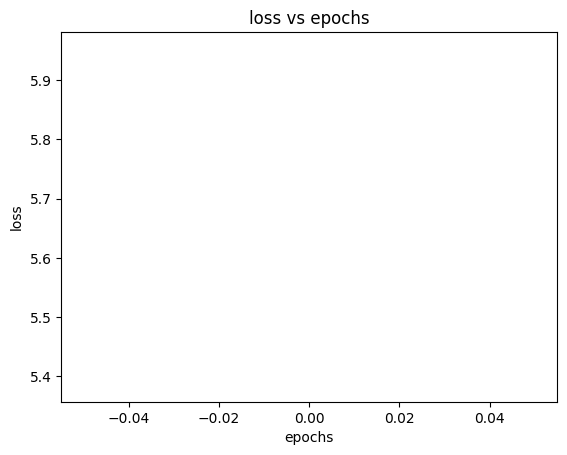

In [183]:
plt.plot(history.history['loss'],color='red')
#plt.plot(history.history['val_loss'],color='blue')
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [186]:
x=[[2807,0,0,0,0,0,0,0,0]]

In [188]:
pred=mod.predict(np.array(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


In [189]:
pred

array([[[4.9198901e-05, 7.0211332e-05, 4.8575504e-05, ...,
         3.0956417e-05, 3.0954045e-05, 3.0957970e-05],
        [2.0355885e-04, 1.4913733e-04, 1.3172172e-04, ...,
         2.6288213e-05, 2.6001251e-05, 2.6245511e-05],
        [2.0898687e-02, 4.3450386e-04, 1.6597810e-03, ...,
         6.3513276e-06, 6.0216307e-06, 6.2967829e-06],
        ...,
        [8.7355983e-01, 2.3348324e-04, 3.8723259e-03, ...,
         8.0126683e-10, 6.9860140e-10, 7.9227774e-10],
        [8.7480205e-01, 2.3168020e-04, 3.8576983e-03, ...,
         7.7459517e-10, 6.7519390e-10, 7.6597539e-10],
        [8.7496841e-01, 2.3143430e-04, 3.8557192e-03, ...,
         7.7105555e-10, 6.7209049e-10, 7.6248097e-10]]], dtype=float32)

In [191]:
ind=np.argmax(pred[0][0])
ind

1

In [193]:
for word,index in fv.word_index.items():
    if index==1:
        print(f"{word}")

   

je


In [195]:
for word,index in ev.word_index.items():
    if index==2807:
        print(f"{word}")
    

hi


<B>So as you can see above , the translation for the english word hi is given as je which is the french translation for the word 'I'.<br>
The model has errors so the translations are not accurate.<br>
You can also test with other arrays. 


## <B> You can ignore the below part.

In [135]:
embedding_dim = 100  # Embedding size for each token
latent_dim = 256  # Latent dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(8,))
x = Embedding(y, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(x)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(8,))
decoder_embedding = Embedding(fre_len, embedding_dim)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_dense = TimeDistributed(Dense(fre_len, activation='softmax'))

decoder_embedded = decoder_embedding(decoder_inputs)
decoder_outputs, _, _ = decoder_lstm(decoder_embedded, initial_state=encoder_states)
decoder_outputs = decoder_dense(decoder_outputs)

# Model definition
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [160]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)   │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_16 (InputLayer)   │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_21 (Embedding)      │ (None, 8, 100)            │       1,456,600 │ input_layer_15[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_22 (Embedding)      │ (None, 8, 100)            │       3,081,900 │ input_layer_16[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_38 (LSTM)                │ [(None, 256), (None,      │         365,568 │ embedding_21[0][0]         │
│                               │ 256), (None, 256)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_39 (LSTM)                │ [(None, 8, 256), (None,   │         365,568 │ embedding_22[0][0],        │
│                               │ 256), (None, 256)]        │                 │ lstm_38[0][1],             │
│                               │                           │                 │ lstm_38[0][2]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ time_distributed              │ (None, 8, 30819)          │       7,920,483 │ lstm_39[0][0]              │
│ (TimeDistributed)             │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 39,570,359 (150.95 MB)

 Trainable params: 13,190,119 (50.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,380,240 (100.63 MB)

In [136]:
def one_hot_encode(sequences, vocab_size):
    return np.array([np.eye(vocab_size)[seq] for seq in sequences])

In [143]:
from keras.utils import to_categorical 

In [147]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [166]:
mod.fit(xtrain,ytrain,batch_size=64, epochs=10, validation_data=(xtest,ytest))

Epoch 1/10


KeyboardInterrupt: 

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ytr=

MemoryError: Unable to allocate 258. GiB for an array with shape (1123968, 30819) and data type float64